In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [32]:
# Loading  the dataset
df = pd.read_csv('HES_M3_OPEN_DATA.csv')

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CALENDAR_MONTH_END_DATE           207 non-null    object 
 1   APC_Finished_Consultant           207 non-null    int64  
 2   APC_FCEs_with_a_procedure         207 non-null    int64  
 3   APC_Percent_FCEs_with_procedure   207 non-null    float64
 4   APC_Ordinary_Episodes             207 non-null    int64  
 5   APC_Day_Case_Episodes             207 non-null    int64  
 6   APC_Day_Case_Episodes_with_proc   207 non-null    int64  
 7   APC_Percent_Day_Cases_with_proc   207 non-null    float64
 8   APC_Finished_Admission_Episodes   207 non-null    int64  
 9   APC_Emergency                     207 non-null    int64  
 10  Outpatient_Total_Appointments     207 non-null    int64  
 11  Outpatient_Attended_Appointments  207 non-null    int64  
 12  Outpatie

In [33]:
# Printing the first five rows
print(df.head())

  CALENDAR_MONTH_END_DATE  APC_Finished_Consultant  APC_FCEs_with_a_procedure  \
0                   JUN24                  1777572                     749987   
1                   MAY24                  1912233                    1090340   
2                   APR24                  1848413                    1087401   
3                   MAR24                  1870822                    1091092   
4                   FEB24                  1798375                    1058672   

   APC_Percent_FCEs_with_procedure  APC_Ordinary_Episodes  \
0                             0.42                1108379   
1                             0.57                1189060   
2                             0.59                1148319   
3                             0.58                1168312   
4                             0.59                1113174   

   APC_Day_Case_Episodes  APC_Day_Case_Episodes_with_proc  \
0                 669193                           479867   
1                 723173

In [34]:
# Convert the CALENDAR_MONTH_END_DATE to datetime format if it's not already
df['CALENDAR_MONTH_END_DATE'] = pd.to_datetime(df['CALENDAR_MONTH_END_DATE'], format='%b%y')

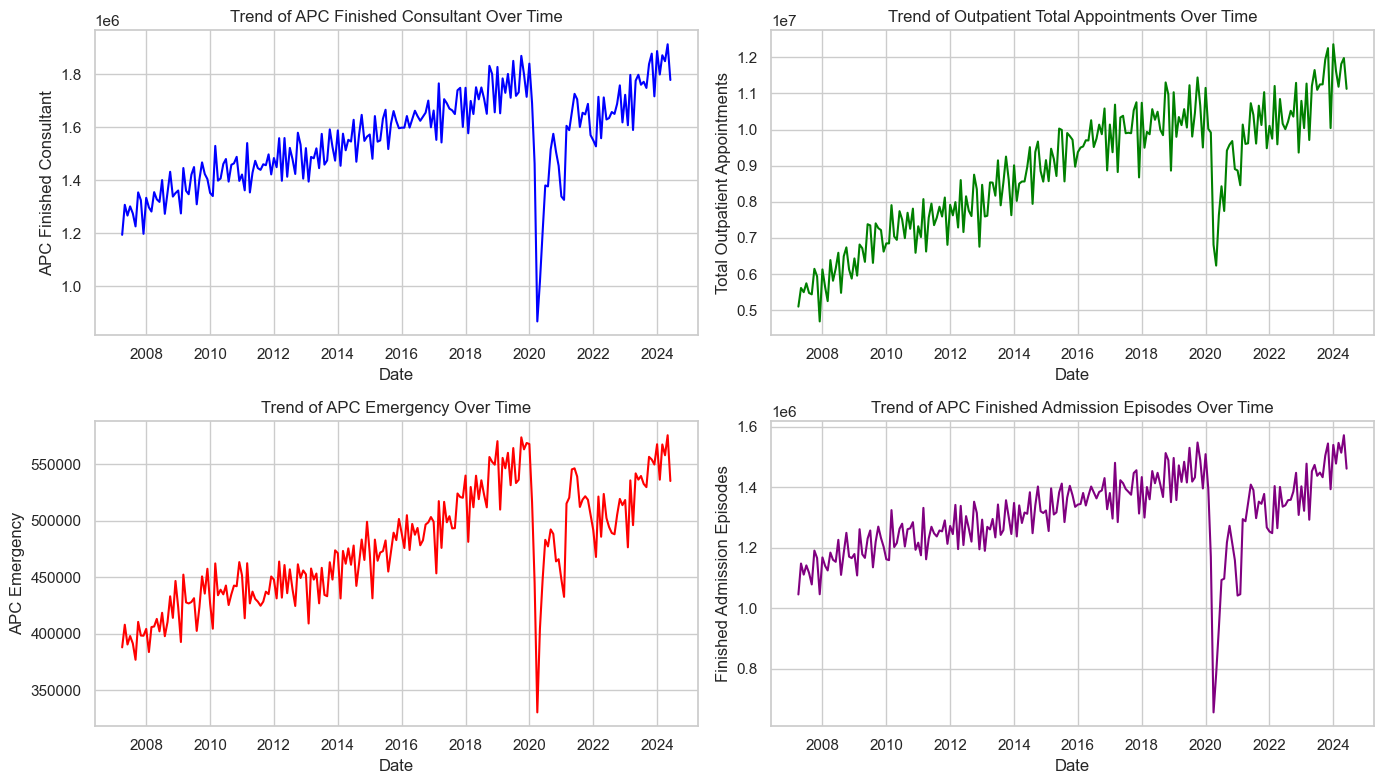

In [35]:
# Set the plotting style
sns.set(style="whitegrid")

# Plotting trends for some key metrics over time
plt.figure(figsize=(14, 8))

# Plot APC_Finished_Consultant over time
plt.subplot(2, 2, 1)
plt.plot(df['CALENDAR_MONTH_END_DATE'], df['APC_Finished_Consultant'], color='blue')
plt.title('Trend of APC Finished Consultant Over Time')
plt.xlabel('Date')
plt.ylabel('APC Finished Consultant')

# Plot Outpatient_Total_Appointments over time
plt.subplot(2, 2, 2)
plt.plot(df['CALENDAR_MONTH_END_DATE'], df['Outpatient_Total_Appointments'], color='green')
plt.title('Trend of Outpatient Total Appointments Over Time')
plt.xlabel('Date')
plt.ylabel('Total Outpatient Appointments')

# Plot APC_Emergency over time
plt.subplot(2, 2, 3)
plt.plot(df['CALENDAR_MONTH_END_DATE'], df['APC_Emergency'], color='red')
plt.title('Trend of APC Emergency Over Time')
plt.xlabel('Date')
plt.ylabel('APC Emergency')

# Plot APC_Finished_Admission_Episodes over time
plt.subplot(2, 2, 4)
plt.plot(df['CALENDAR_MONTH_END_DATE'], df['APC_Finished_Admission_Episodes'], color='purple')
plt.title('Trend of APC Finished Admission Episodes Over Time')
plt.xlabel('Date')
plt.ylabel('Finished Admission Episodes')

plt.tight_layout()
plt.show()

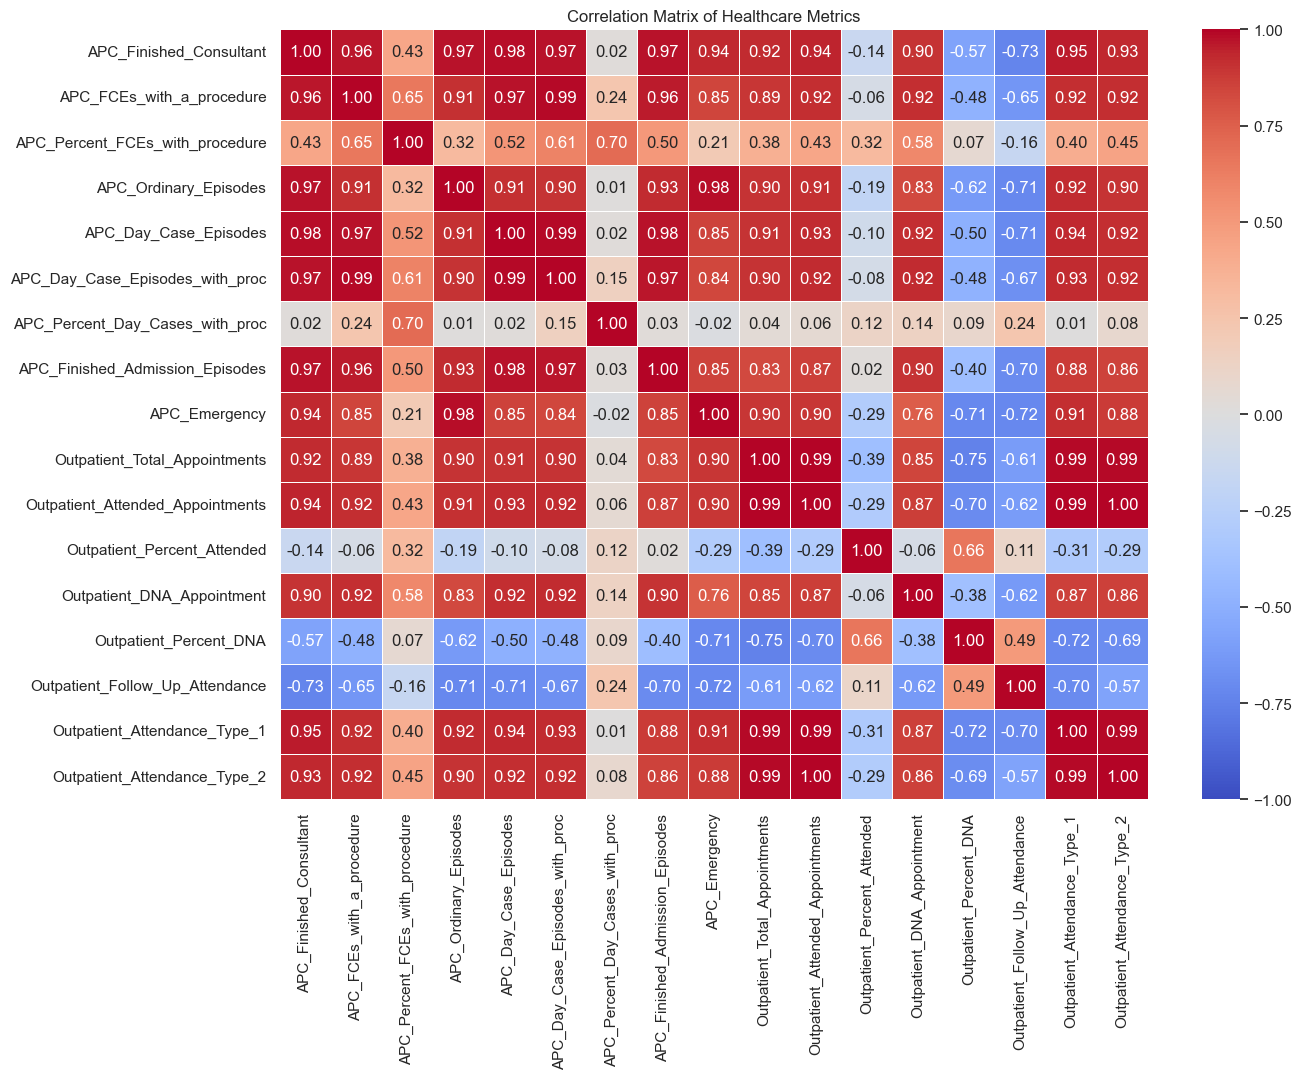

In [36]:
# Correlation matrix to analyze the relationship between different metrics
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Healthcare Metrics')
plt.show()

Mean Squared Error: 3.484935554417693e-20


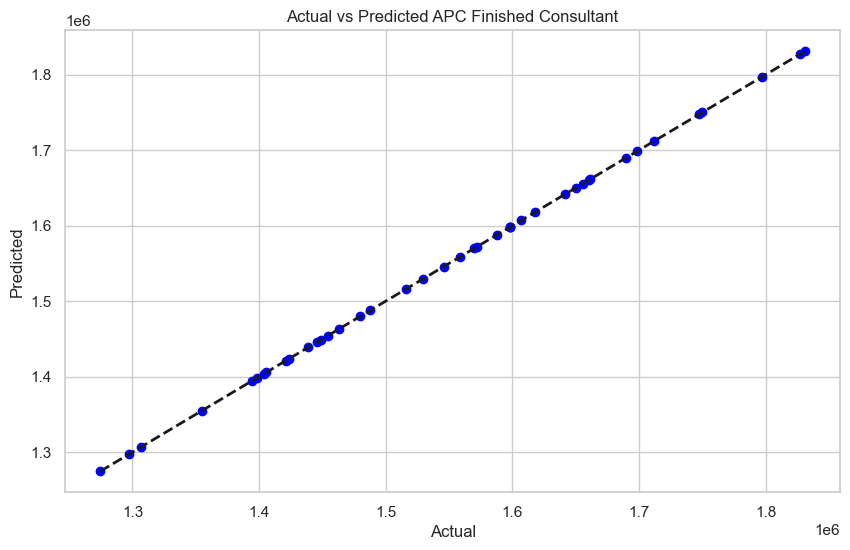

In [37]:
# Example: Predicting 'APC_Finished_Consultant' using other features
X = df.drop(['CALENDAR_MONTH_END_DATE', 'APC_Finished_Consultant'], axis=1)
y = df['APC_Finished_Consultant']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted APC Finished Consultant')
plt.show()

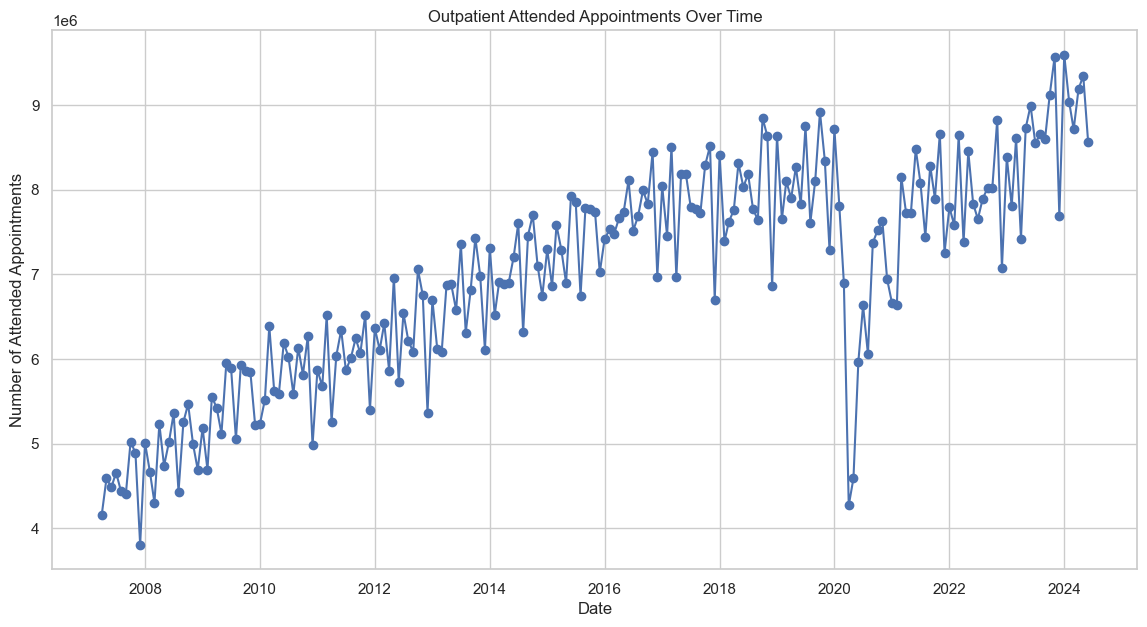

In [38]:
# Visualize the original data
plt.figure(figsize=(14, 7))
plt.plot(df['CALENDAR_MONTH_END_DATE'], df['Outpatient_Attended_Appointments'], marker='o')
plt.title('Outpatient Attended Appointments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Attended Appointments')
plt.grid(True)
plt.show()

/anaconda3/anaconda3/envs/notebook-6.0.0_1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/anaconda3/anaconda3/envs/notebook-6.0.0_1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/anaconda3/anaconda3/envs/notebook-6.0.0_1/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error: 1057915.5914704795


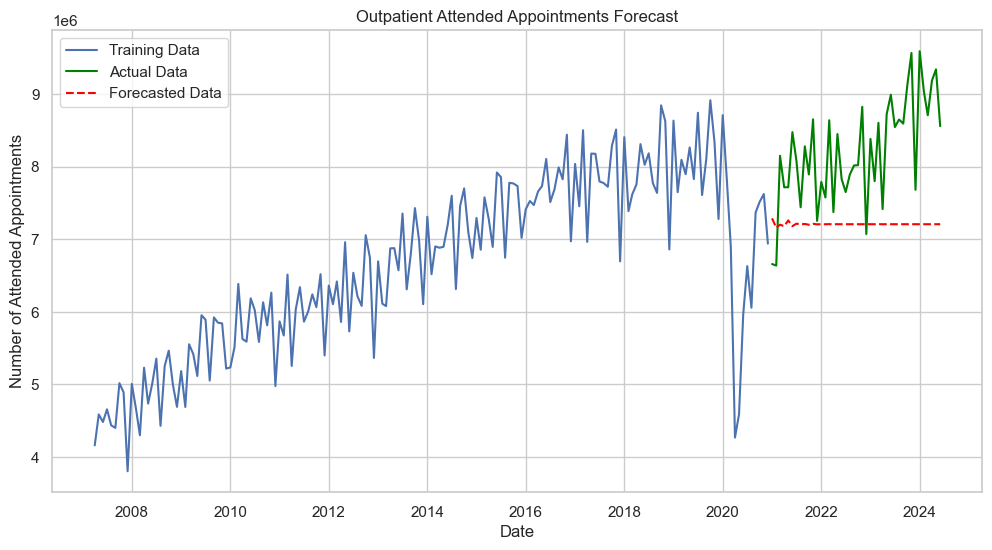

In [39]:
# Convert the date column to datetime and set it as the index
df['CALENDAR_MONTH_END_DATE'] = pd.to_datetime(df['CALENDAR_MONTH_END_DATE'], format='%b%y', errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['CALENDAR_MONTH_END_DATE'], inplace=True)

# Set the datetime column as the index
df.set_index('CALENDAR_MONTH_END_DATE', inplace=True)

# Sort the index to ensure it's in chronological order
df.sort_index(inplace=True)

# Prepare the time series data
ts_data = df['Outpatient_Attended_Appointments']

# Split the data into train and test sets
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Build and fit the ARIMA model (use the order (5, 1, 0) as given)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next points in the test set
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='green')
plt.plot(test.index, forecast, label='Forecasted Data', color='red', linestyle='--')
plt.title('Outpatient Attended Appointments Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Attended Appointments')
plt.legend()
plt.grid(True)
plt.show()
